#### 머신러닝 - 지도학습

* 지도학습이란 정답을 알려주고 그 정답과 예측한 값을 비교하는 기계학습니다.
* 지도학습 알고리지므
  - 선형회귀분석
  - 의사결정나무
  - SVM
  - KNN
  - NN

#### 1. 선형회귀분석
##### 1. 선형회귀분석모델(Linear Regression Model)
* 선형회귀 or 최소제곱법(OLS, Old Least Squares)은 가장 간단하고 오래된 알고리즘이다.
* 선형회귀는 예측과 훈련용세트에 타겟(정답, lable, 종속변수 y^...)사이의 `평균제곱오차(MSE, Mean Square Error)를 최소화`하는
  w(기울기, slope, 가중치, weight)와 b(편향, 절편, bias, intercept)를 구하는 알고리즘이다.
* 평균제곱오차는 예측값과 정답의 차이(에러, 오류)를 제곱하여 총합을 구하고 샘플의 갯수로 나눈 값이다.
  
$$MSE = \frac{1}{n}\sum_{i=1}^{n}\left ( y_i - \tilde{y_i} \right )^{2}$$
$$RMSE = \frac{1}{n}\sqrt{\sum_{i=1}^{n}\left ( y_i - \tilde{y_i} \right )^{2}}$$

w[0]: 0.393906  b: -0.031804


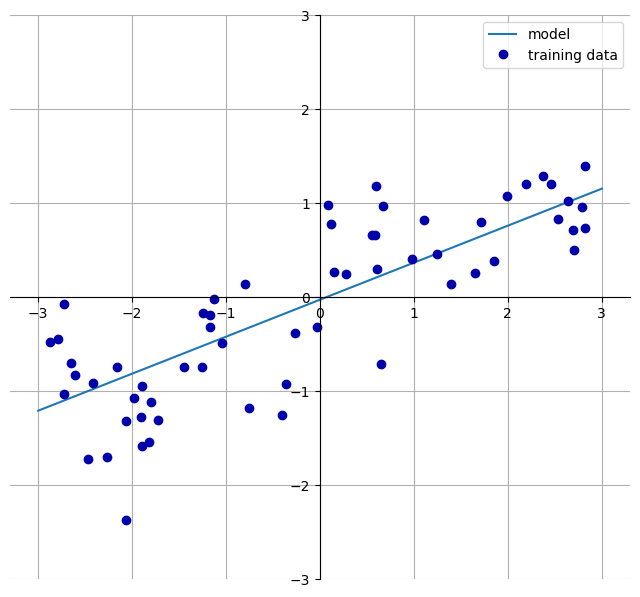

In [1]:
import mglearn
mglearn.plots.plot_linear_regression_wave() # 1차원데이터셋

In [2]:
import mglearn
from sklearn.linear_model import LinearRegression    # 선형회귀분석모델(알고리즘)
from sklearn.model_selection import train_test_split # 훈련용과 검증용데이터를 자동으로 분할

In [19]:
# 1. 무작위로 임의의 데이터를 생성
X, y = mglearn.datasets.make_wave(n_samples=100)
print(type(X), X.shape, len(X))
print(type(y), y.shape, len(y))

# 2. 훈련용과 검증용 데이터를 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 3. 기계학습(머신러닝)
lr = LinearRegression().fit(X_train, y_train)
print(type(lr), lr)
print(dir(lr))

# 4. 모델평가
print(f'lr.coef_(가중치 or 기울기) = {lr.coef_}')
print(f'lr.coef_(편향 or bias) = {lr.intercept_}')

# 5. 결과 : y = wx + b
# y = 0.40443939 * x + -0.022568028173365354

# 6. 결과분석
# 기울기 파라미터(w)는 가중치 또는 (상관)계수라고 하면 lr모델의 coef_에 저장되고
# 편향(offset, bias, 절편(intercept))는 intercept_속성에 저장된다.

<class 'numpy.ndarray'> (100, 1) 100
<class 'numpy.ndarray'> (100,) 100
<class 'sklearn.linear_model._base.LinearRegression'> LinearRegression()
['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_decision_function', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_set_intercept', '_validate_data', '_validate_params', 'coef_', 'copy_X', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'n_features_in_', 'n_jobs', 'positive', 'predict', 'rank_', 'score', 'set_params'

In [20]:
# 7. 평가(검증)
print(f'훈련용데이터셋의 점수 = {lr.score(X_train, y_train)}') # score = R2값 즉 MSE값
print(f'검증용데이터셋의 점수 = {lr.score(X_test, y_test)}')

# 결과분석
# 검증용의 R2값이 0.66은 좋지 않은 결과이다. 그래서 이 모델을 과소적합상태이다.

훈련용데이터셋의 점수 = 0.5932911361660249
검증용데이터셋의 점수 = 0.6599448011276341


In [24]:
# 1차원데이터셋에선는 모델이 단순하기 때문에 과(대,소)적합화를 우려할 필요가 없지만
# 다차원 즉, 특성(X값)이 많은 데이터셋에서는 선형모델성능이 매우 높아져서 과대적합화가 
# 될 가능성이 매우 높다.
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print(f'훈련용데이터셋의 점수 = {lr.score(X_train, y_train)}')
print(f'검증용데이터셋의 점수 = {lr.score(X_test, y_test)}')

# 결과분석
# 과거데이터는 94%의 예측률이지만 미래데이터는 78%의 예측률
# 즉, 과거데이터는 예측을 잘하지만 미래데이터는 예측을 잘하기 못하는
# 과대적합화 현상을 보인다.

훈련용데이터셋의 점수 = 0.9448313975211591
검증용데이터셋의 점수 = 0.7758378393351681


#### 3. Ridge회귀분석

* 릿지회귀분석도 회귀분석을 위한 선형모델이다.
* 하지만, 릿지회쉬분석은 특성들이 가중치(기울기)에 주는 영향을 최소화 하기 위해
* 규제(Reqularization)를 할 수 있다.
* 규제란? 기계학습모델이 과적합화가 되지 않도록 모델을 강제로 제한한다는 의미
* 규제는 L1규제와 L2규제가 있는 데 `릿지회귀분석에서는 L2규제를 사용`한다.

In [28]:
from sklearn.linear_model import Ridge

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
ridge = Ridge().fit(X_train, y_train)

print(f'훈련용데이터셋의 점수 = {ridge.score(X_train, y_train):.3f}')
print(f'검증용데이터셋의 점수 = {ridge.score(X_test, y_test):.3f}')

# 결과분석
# LinearRegression모델보다 훈련용의 예측률보다는 낮지만
# 검증용(미래데이터)은 훈련용보다 높게 예측이 되었다.
# 이러한 점은 과대적합화가 발생할 가능성이 낮아 졌다는 의미이다.

훈련용데이터셋의 점수 = 0.870
검증용데이터셋의 점수 = 0.815


In [34]:
# 규제는 Ridge모델의 alpha(Regularization Strength)라는 옵션은 과대적합이 발생
# 되지 않도록 조정하는 값이다. 기본값은 1이다.
# aplph값을 높이면 예측률은 낮아지고 낮추면 예측률은 올라간다.

for i in range(10, 1, -2):
    ridge = Ridge(alpha=i).fit(X_train, y_train)
    print(f'훈련용데이터셋의 점수 = {ridge.score(X_train, y_train):.3f}')
    print(f'검증용데이터셋의 점수 = {ridge.score(X_test, y_test):.3f}')
    print()
    
print()
ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print(f'훈련용데이터셋의 점수 = {ridge.score(X_train, y_train):.3f}')
print(f'검증용데이터셋의 점수 = {ridge.score(X_test, y_test):.3f}')

# alpha값은 정해진 값이 아니라 알파값을 조금씩 변경후에 여러번 훈련을 시켜서
# 얻은 최적의 모델을 선택해야 하는 시행착오를 거쳐야 한다.

훈련용데이터셋의 점수 = 0.767
검증용데이터셋의 점수 = 0.728

훈련용데이터셋의 점수 = 0.779
검증용데이터셋의 점수 = 0.739

훈련용데이터셋의 점수 = 0.794
검증용데이터셋의 점수 = 0.753

훈련용데이터셋의 점수 = 0.814
검증용데이터셋의 점수 = 0.771

훈련용데이터셋의 점수 = 0.845
검증용데이터셋의 점수 = 0.797


훈련용데이터셋의 점수 = 0.917
검증용데이터셋의 점수 = 0.825


#### 1. 회귀분석실습

* 회귀분석 : 전기소비량과 전기생산량의 상관관계를 분석
* 귀무가설 : 대립가설의 반대가설, 즉, 소비량과 생산량은 관계가 없다.(영가설, H0)
* 대립가설 : 내가 주장하고 싶은 가설, 전기생산량과 전기소비량의 상관관계가 있다.

In [12]:
import statsmodels.api as sm
from scipy import stats

In [13]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.unicode_minus'] = False

In [51]:
# 월별 전기생산금액(단위 : 억원)
X = [3.52,2.58,3.31,4.07,4.62,3.98,4.29,4.83,3.71,4.61,3.90,3.20]
# 월별 전기사용량(단위 : 백만kwh)
y = [2.48,2.27,2.47,2.77,2.98,3.05,3.18,3.46,3.03,3.25,2.67,2.53]

# stats.linregress
# 결과 : slope(기울기, 가중치), intercept(편향, 절편, bias), rvalue(R2값)
# pvalue(피어슨벨류, 예측불확실의 정도) : 0.05이하(95%이상)일때 통계적으로 유의(미)하다. 
# stats.linregress?
result = stats.linregress(X, y)
print(type(result), result)
print(f'기울기 = {result.slope}')
print(f'편향 = {result.intercept}')
print(f'R2 = {result.rvalue}')
print(f'피어슨값 = {result.pvalue}')

# 결과분석
# p-value(pearson value) - 9.238421943157891e-05 < 0.05
# 99%신뢰하에 통계적으로 유의하다. 즉 대립가설을 채택하고 귀무가설을 기각한다.
# rvalue = 0.89 : 89%만큼의 설명력(예측력)이 있다.

<class 'scipy.stats._stats_mstats_common.LinregressResult'> LinregressResult(slope=0.4956032360182905, intercept=0.9195814280689418, rvalue=0.8929235125385305, pvalue=9.238421943157891e-05, stderr=0.07901935226531728, intercept_stderr=0.3110591892275586)
기울기 = 0.4956032360182905
편향 = 0.9195814280689418
R2 = 0.8929235125385305
피어슨값 = 9.238421943157891e-05


In [52]:
slope, intercept, rvalue, pvalue, stderr = result

# y = slope * X + intercept : 최적의 선형
y1 = slope * 4.00 + intercept
print(f'전기생산량이 4억원일 때 예측전기소비량 = {y1:.2f} 백만kwh')

전기생산량이 4억원일 때 예측전기소비량 = 2.90 백만kwh


In [53]:
# 선형회귀분석 시각화
# 예측전기소비량 = 기울기 * 전기생산금액 + 편향
X1 = np.array(X)  # list자료형을 ndarray로 형변환
y1 = slope * X1 + intercept
print(y1)

[2.66410482 2.19823778 2.56002814 2.9366866  3.20926838 2.89208231
 3.04571931 3.31334506 2.75826943 3.20431235 2.85243405 2.50551178]


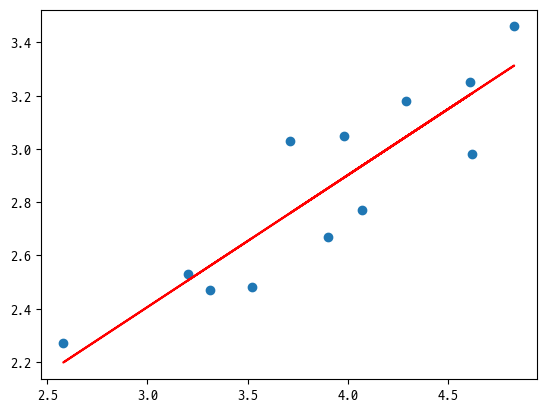

In [55]:
plt.scatter(X, y)
plt.plot(X1, y1, c='red')
plt.show()

In [58]:
# 전기소비량을 예측
f = 5.0 
result = slope * f + intercept
print(f'전기생산량(금액)이 {f}억원 일 때 예측 전기소비량은 {result:.2f}백만kw/h')

전기생산량(금액)이 5.0억원 일 때 예측 전기소비량은 3.40백만kw/h


#### 분류모델
* 종속변수(y값, label)가 이산형(분류형, 예: 유방암여부)일 경우에 사용되는 회귀분석방법이 `로지스틱회귀분석(Logistic Regression)`이 있다.
* 로지스틱회귀분석은 선형이 아니라 분류알고리즘이다.

##### 분류알고리즘
* 가장 대표적인 알고리즘 2가지
  - Logistic Regression
  - SVM(Support Vector Machine)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [63]:
# 실습용분류데이터셋 - mglearn의 forge데이터셋
X, y = mglearn.datasets.make_forge()
print(type(X), len(X), X)
print(type(y), len(y), y)

<class 'numpy.ndarray'> 26 [[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
<class 'numpy.ndarray'> 26 [1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


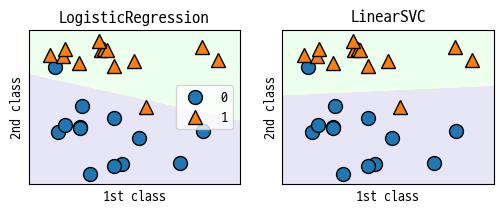

In [93]:
# forge 데이터셋 시각화
fig, axes = plt.subplots(1,2,figsize=(6,2))
# print(fig, axes)

for model, ax in zip([LogisticRegression(), LinearSVC()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_classification(clf, X, fill=False, eps=0.5, ax=ax, alpha=.1)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(f'{clf.__class__.__name__}')
    ax.set_xlabel('1st class')
    ax.set_ylabel('2nd class')

axes[0].legend()
plt.show()

# 결과분석
# 2개의 모델 각각 결정경계가 선형으로 분류되어 위쪽은 세모(1)로 분류
# 아래쪽은 동그라미(0)으로 분류되었다.
# LogisticRegression, LinearSVC모델은 각각 2개의 데이터를 잘못 분류되었다.
# 2개의 모델은 릿지와 같이 L2규제를 사용, 규제강도를 설정하는 매개변수가 C이다.
# C값이 높아지면 가능한 최대로 분류(과대적합발생확률이 높다)하기 위해 노력한다.

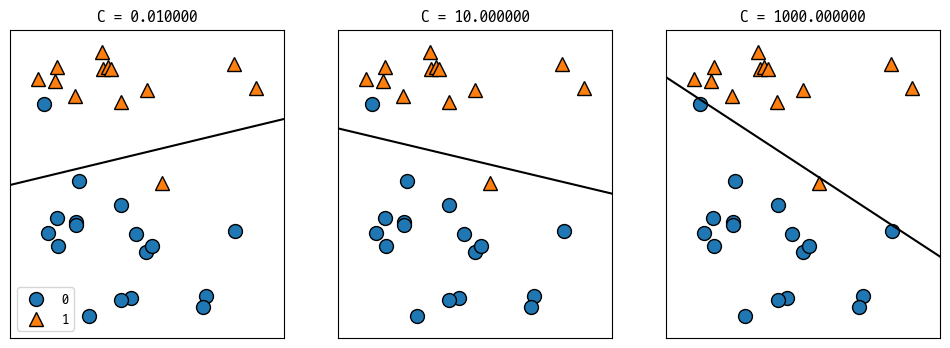

In [95]:
# L2규제조정(C깂을 조정)
mglearn.plots.plot_linear_svc_regularization()

#### 실습. 유방암 데이터셋
* sklearn.datasets.load_breast_cancer
* 유방암의 특성치의 갯수?
* 유방암여부 즉, 양성갯수? 악성갯수?
* LogisticRegression() : 훈련용/검증용의 데이터셋 점수
  - C값 1.0, 100, 0.01일때의 각각의 점수

In [113]:
# mglearn.datasets.make_forge() 
# malignant: 악성, benign : 양성
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test \
    = train_test_split(cancer.data, cancer.target
                       , stratify=cancer.target
                       , random_state=42)                    

In [114]:
print(f'유방암 데이터셋의 특성치의 갯수 = {cancer.data[0].shape}')
print(f'유방암 데이터셋의 정답 = {np.unique(cancer.target)}')
print(cancer.DESCR)

유방암 데이터셋의 특성치의 갯수 = (30,)
유방암 데이터셋의 정답 = [0 1]
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 3

In [115]:
# LogisticRegression(C=1.0)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(f'훈련용데이터셋의 예측(C=1.0) = {lr.score(X_train, y_train):.3f}')
print(f'검증용데이터셋의 예측(C=1.0) = {lr.score(X_test, y_test):.3f}')

훈련용데이터셋의 예측 = 0.948
검증용데이터셋의 예측 = 0.944


In [117]:
# LogisticRegression(C=100)
lr = LogisticRegression(C=100).fit(X_train, y_train)
print(f'훈련용데이터셋의 예측(C=100.0) = {lr.score(X_train, y_train):.3f}')
print(f'검증용데이터셋의 예측(C=100.0) = {lr.score(X_test, y_test):.3f}')

훈련용데이터셋의 예측(C=100.0) = 0.944
검증용데이터셋의 예측(C=100.0) = 0.965


In [118]:
# LogisticRegression(C=0.1)
lr = LogisticRegression(C=0.1).fit(X_train, y_train)
print(f'훈련용데이터셋의 예측(C=0.1) = {lr.score(X_train, y_train):.3f}')
print(f'검증용데이터셋의 예측(C=0.1) = {lr.score(X_test, y_test):.3f}')

훈련용데이터셋의 예측(C=0.1) = 0.937
검증용데이터셋의 예측(C=0.1) = 0.944


### 다중분류

In [1]:
import mglearn
from sklearn.datasets import make_blobs

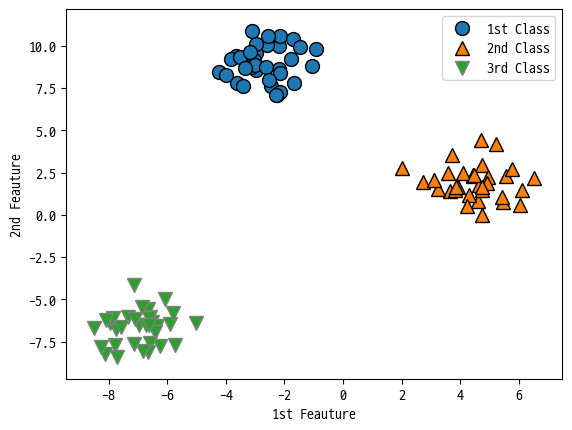

In [18]:
X, y = make_blobs(n_samples=100, random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('1st Feauture')
plt.ylabel('2nd Feauture')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

In [26]:
# SVM으로 분류 - LinearSVC
from sklearn.svm import LinearSVC
linearSVC = LinearSVC().fit(X, y)
# print(dir(linearSVC))
print(f'1st Feature, 2nd Feature에 따른 분류의 값 =\n {linearSVC.coef_}')
print(f'1st Feature, 2nd Feature에 따른 bias 값 =\n {linearSVC.intercept_}')
print()

print(f'1st Feature, 2nd Feature에 따른 분류 갯수 = {linearSVC.coef_.shape}')
print(f'1st Feature, 2nd Feature에 따른 bias 갯수 = {linearSVC.intercept_.shape}')

1st Feature, 2nd Feature에 따른 분류의 값 =
 [[-0.17492515  0.23141135]
 [ 0.47621636 -0.0693652 ]
 [-0.18914309 -0.20399641]]
1st Feature, 2nd Feature에 따른 bias 값 =
 [-1.07745634  0.13140792 -0.08604831]

1st Feature, 2nd Feature에 따른 분류 갯수 = (3, 2)
1st Feature, 2nd Feature에 따른 bias 갯수 = (3,)


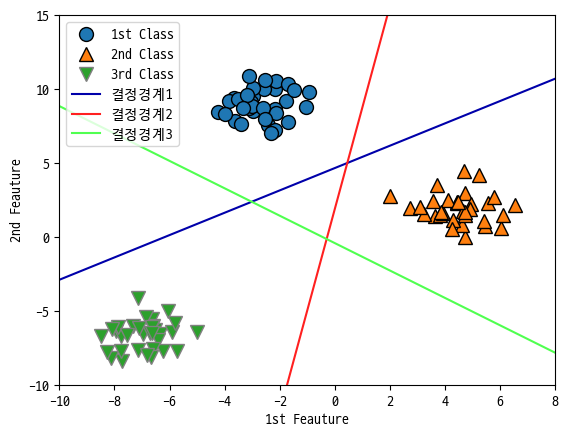

In [41]:
# 특성에 따라 3개로 분류된 결과의 시각화
# LinearSVC모델이 결정경계를 3개로 분류한 결과를 시각화
mglearn.discrete_scatter(X[:,0], X[:,1], y)

line = np.linspace(-15, 15)
# print(line, dir(line))

for coef, intercept, color in zip(linearSVC.coef_, linearSVC.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.xlim(-10, 8)
plt.ylim(-10, 15)
plt.xlabel('1st Feauture')
plt.ylabel('2nd Feauture')
plt.legend(['1st Class', '2nd Class', '3rd Class', '결정경계1','결정경계2','결정경계3'])
plt.show()

#### iris 분류

In [42]:
from sklearn.datasets import load_iris
import seaborn as sns

In [43]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [51]:
print(iris.data[0], iris.data[149])
print(iris.target[1], iris.target[149])
print(iris.feature_names)

[5.1 3.5 1.4 0.2] [5.9 3.  5.1 1.8]
0 2
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [53]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
display(df.head())
display(df.tail())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [60]:
species = pd.Series(iris.target, dtype='category')
species
df['species'] = species
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [62]:
# 샘플데이터
np.random.seed(42)
df.sample(frac=1).reset_index(drop=True).tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.1,2.8,4.0,1.3,1
146,4.9,2.5,4.5,1.7,2
147,5.8,4.0,1.2,0.2,0
148,5.8,2.6,4.0,1.2,1
149,7.1,3.0,5.9,2.1,2


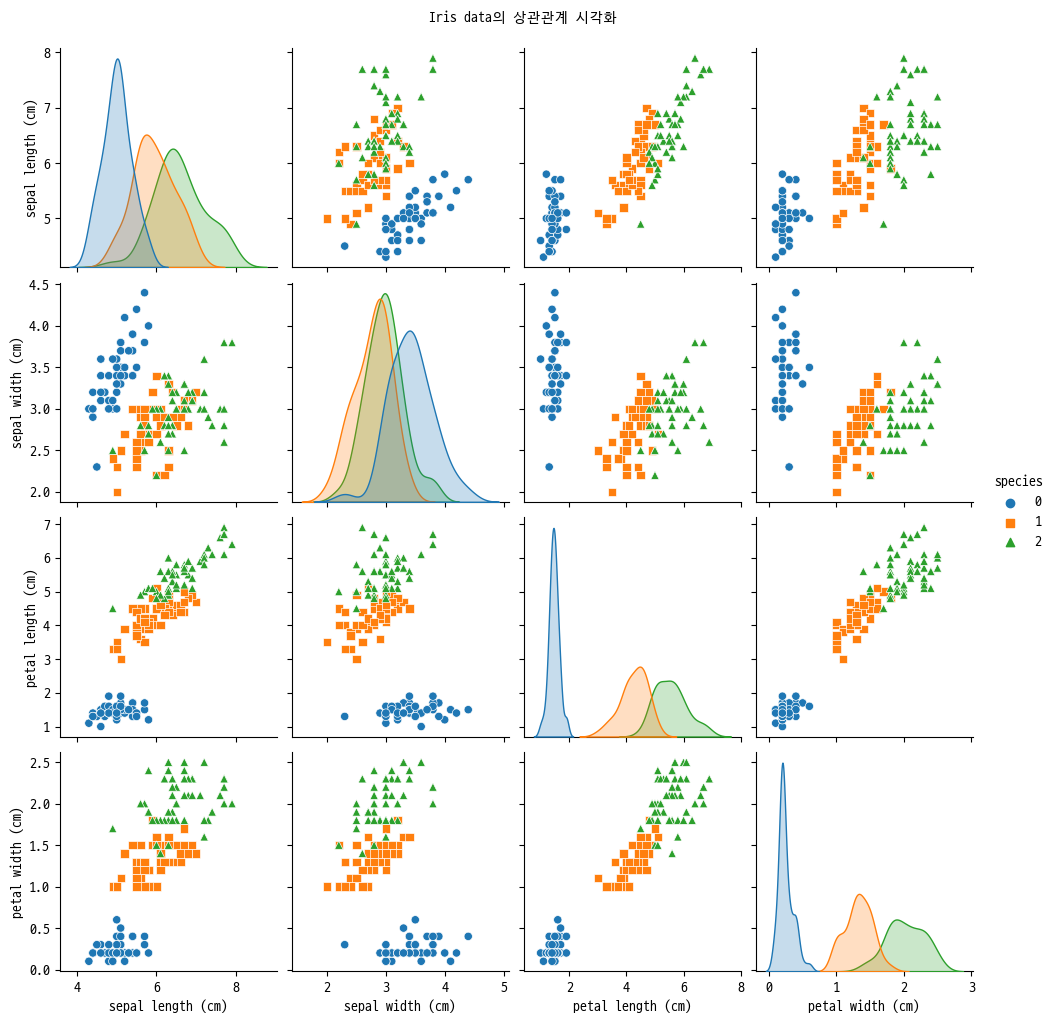

In [66]:
# 상관관계를 시각화하는 그래프 - sns.pairplot()
sns.pairplot(df, hue='species', markers=['o', 's','^'])
plt.suptitle('Iris data의 상관관계 시각화', y=1.02, fontsize=10)
plt.show()

### 실습. 유방암 데이터셋 분석(시각화)
* 임의의 특성치로 시각화하기

In [82]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [83]:
print(cancer.feature_names.size)
print(cancer.feature_names)

30
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [84]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
label = pd.Series(cancer.target, dtype='category')

In [85]:
label.cat.categories
label.cat.rename_categories(cancer.target_names)
df['class'] = label.cat.rename_categories(cancer.target_names)
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,benign


In [79]:
print(cancer.feature_names.size)
print(cancer.feature_names)

30
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


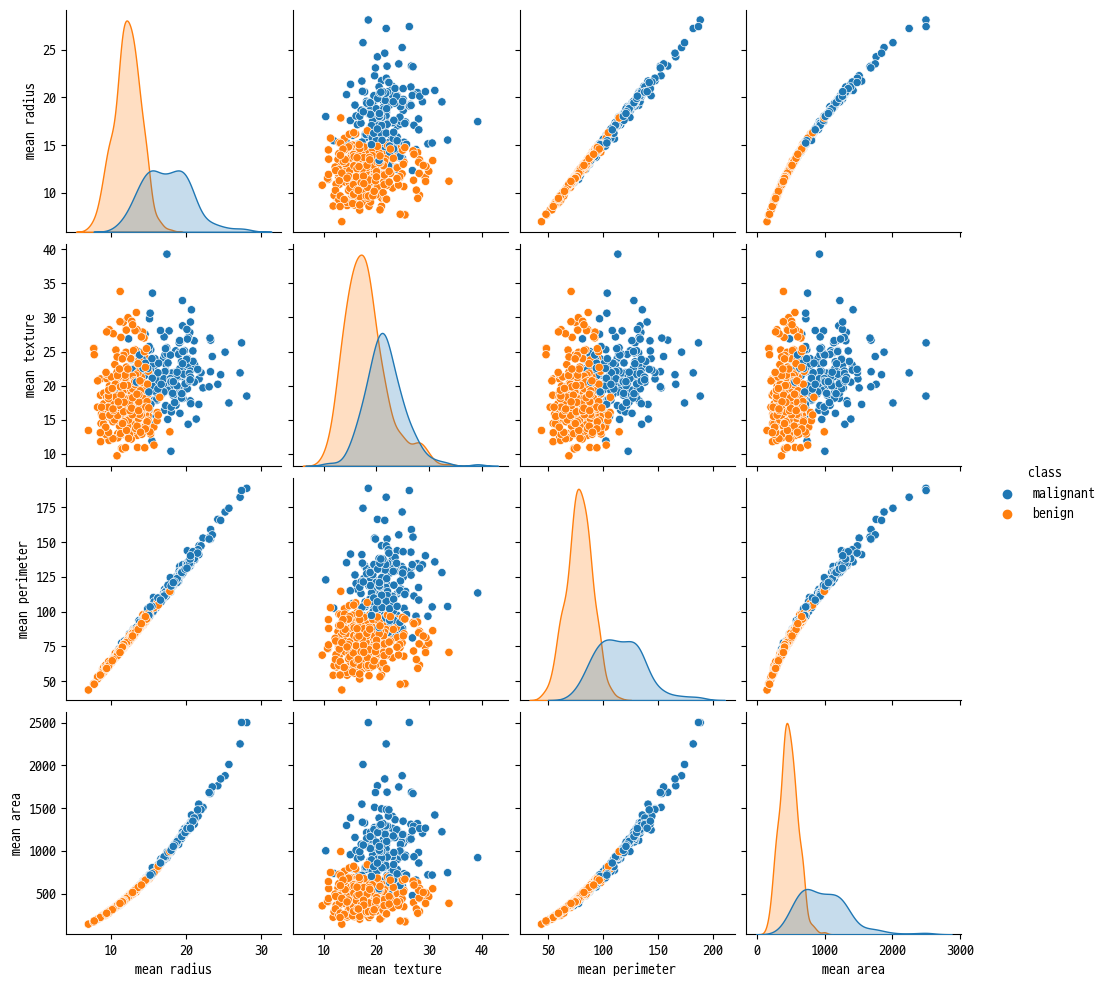

In [87]:
sns.pairplot(df[["mean radius", "mean texture", "mean perimeter", "mean area", "class"]], hue='class')
plt.show()

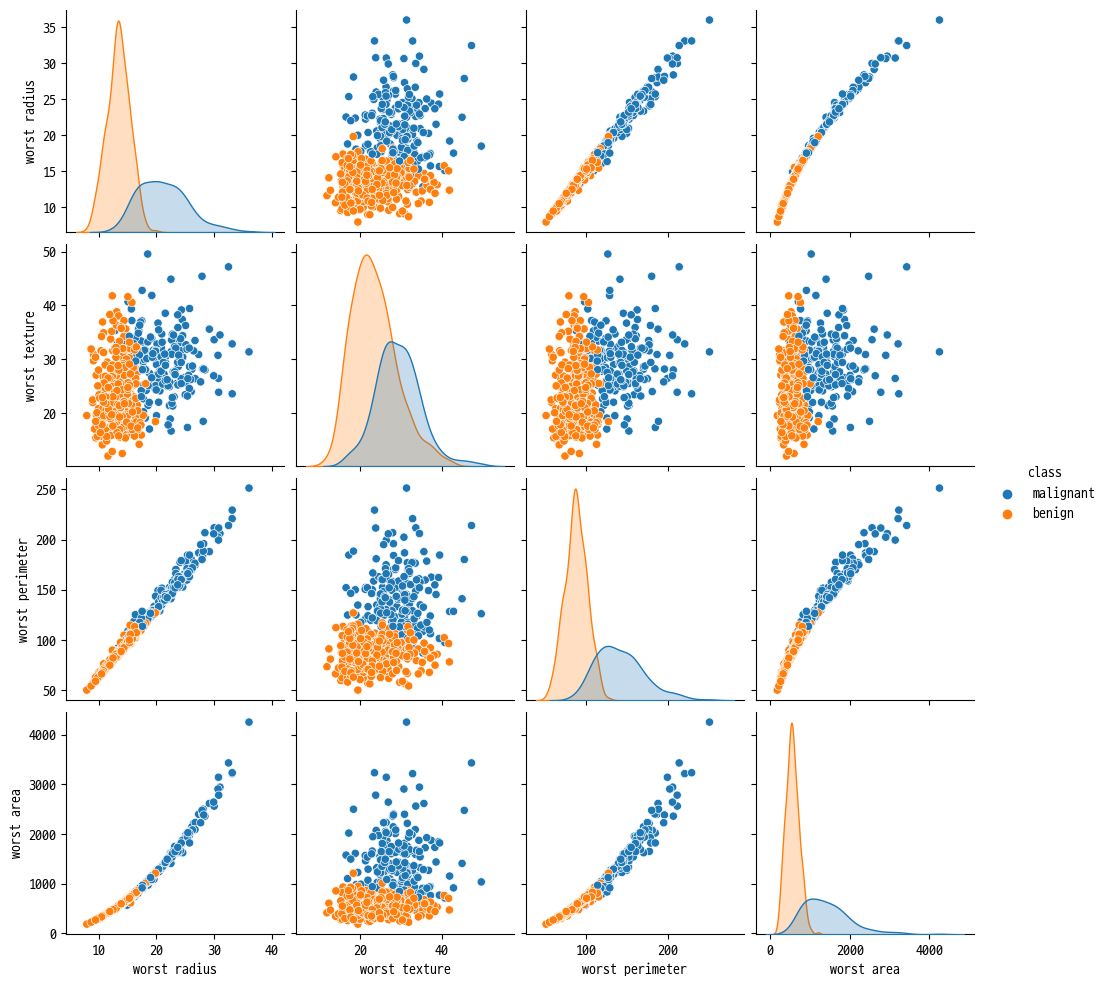

In [88]:
sns.pairplot(df[['worst radius', 'worst texture', 'worst perimeter', 'worst area', "class"]], hue='class')
plt.show()

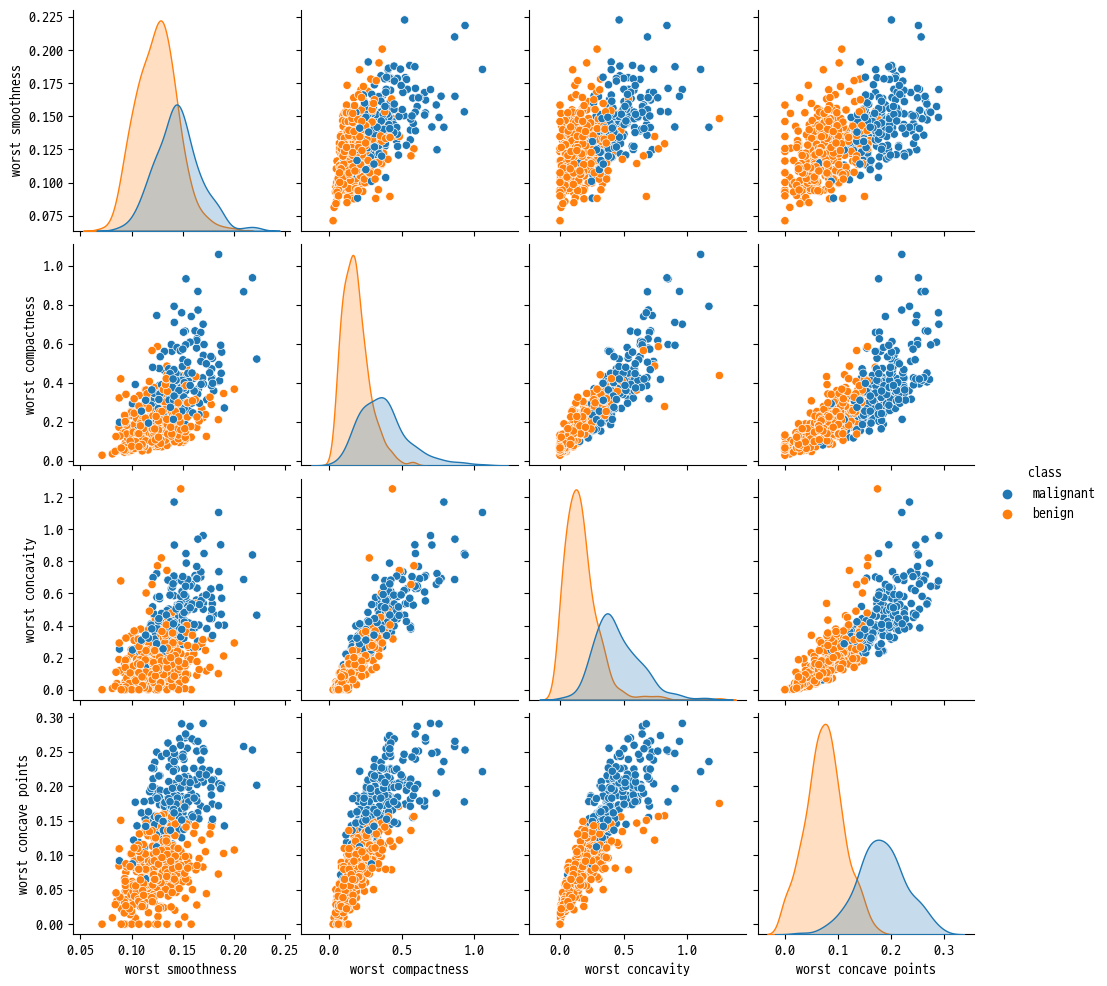

In [90]:
sns.pairplot(df[['worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', "class"]], hue='class')
plt.show()

#### 이미지 데이터셋
1. 올리베티 얼굴 이미지 데이터셋
2. 유명인 얼굴(LFW, Labeled Faces in the World) 이미지 데이터

In [91]:
# 1. 올리베티 얼굴 이미지
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces()
print(olivetti.DESCR)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\EZEN\scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for 

In [97]:
print(olivetti.target)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32

In [133]:
def imgshow(N, M, img, cmap):
    fig = plt.figure(figsize=(8,5))
    plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
    img_list = np.random.choice(range(len(img.data)), N * M) # 10개의 이미지를 무작위로 추출
    # print(img_list)

    for i in range(N):
        for j in range(M):
            k = img_list[i*M+j]
            # print(k)
            ax = fig.add_subplot(N, M, i*M+j+1)
            # print(f'{N}, {M}, {i*M+j+1}')
            ax.imshow(img.images[k], cmap=cmap)
            ax.grid(False)
            ax.xaxis.set_ticks([])
            ax.yaxis.set_ticks([])
            plt.title(img.target[k])

    plt.tight_layout()
    plt.show()

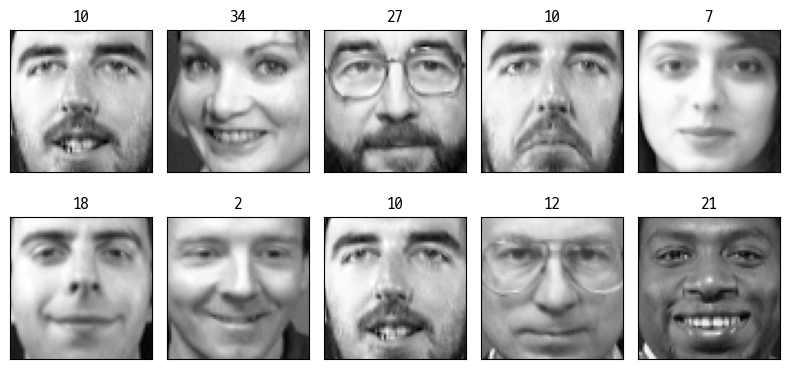

In [138]:
np.random.seed(42)
imgshow(2, 5, olivetti, plt.cm.gray)

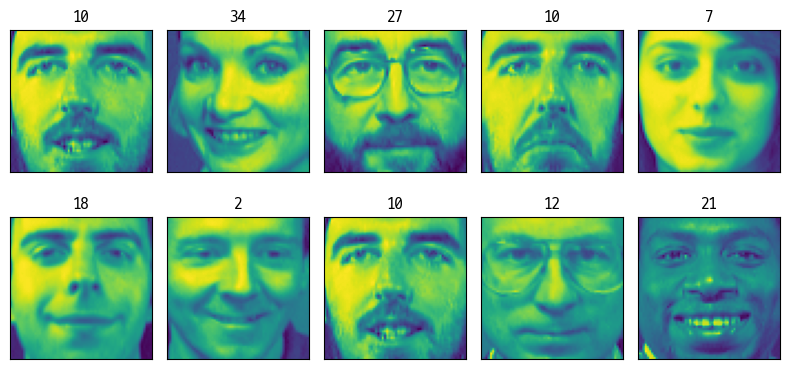

In [139]:
np.random.seed(42)
imgshow(2, 5, olivetti, plt.cm.viridis)

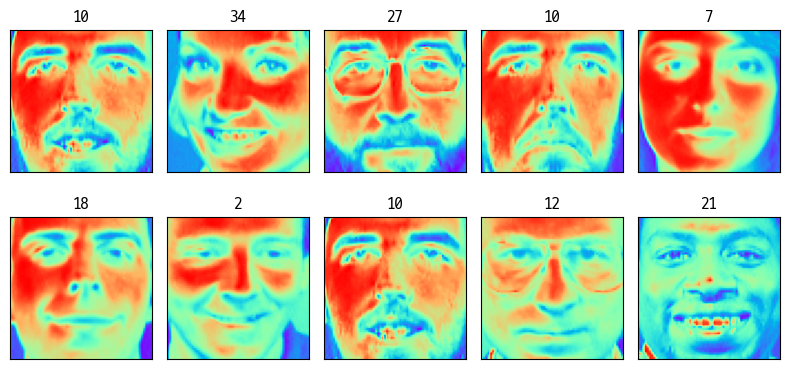

In [141]:
np.random.seed(42)
imgshow(2, 5, olivetti, plt.cm.rainbow)

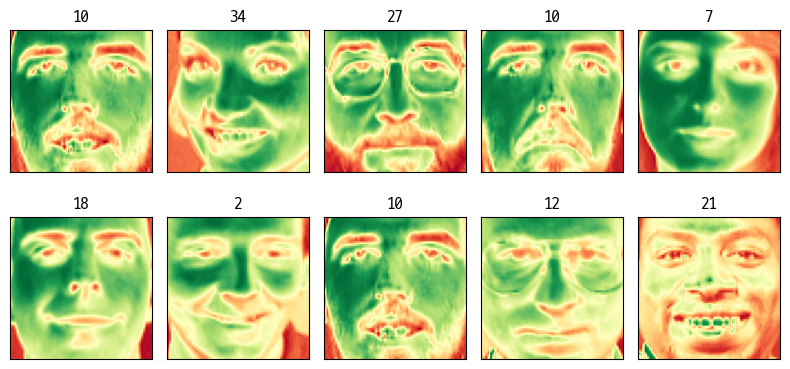

In [142]:
np.random.seed(42)
imgshow(2, 5, olivetti, 'RdYlGn')

In [143]:
# 2. LFW(유명인 얼굴)이미지
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
print(lfw_people.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

In [153]:
print(lfw_people.data.dtype)
print(lfw_people.data.shape)
print(lfw_people.images.shape) # 3차원 데이터 즉, 컬러이미지
print(lfw_people.target.shape, lfw_people.target[:-5])

float32
(1288, 1850)
(1288, 50, 37)
(1288,) [5 6 3 ... 6 3 1]


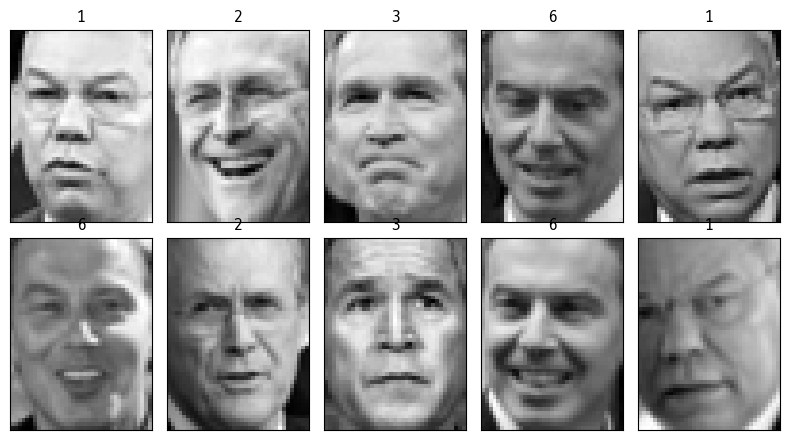

In [155]:
np.random.seed(42)
imgshow(2,5,lfw_people,'gray')

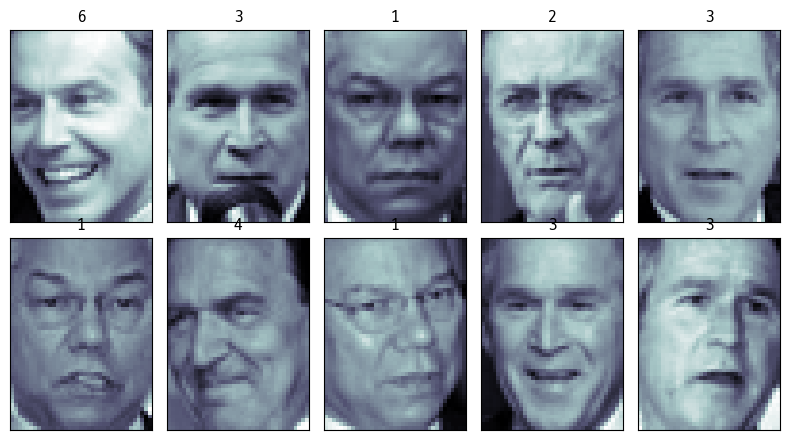

In [156]:
np.random.seed(0)
imgshow(2,5,lfw_people,plt.cm.bone)